# Analysis - exp7

A wythoff stumbler-strategist hyper-parameter search.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Find the files
path = "/Users/type/Code/azad/data/wythoff/exp7/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*")))
files[:10]

['/Users/type/Code/azad/data/wythoff/exp7/run_0.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_1.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_10.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_11.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_12.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_13.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_14.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_15.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_16.pkl',
 '/Users/type/Code/azad/data/wythoff/exp7/run_17.pkl']

In [3]:
model = th.load(files[0])

In [4]:
model.keys()

dict_keys(['episode', 'epsilon', 'anneal', 'gamma', 'num_episodes', 'num_stumbles', 'num_strategies', 'influence', 'stumbler_score', 'strategist_score', 'stumbler_game', 'strategist_game', 'cold_threshold', 'hot_threshold', 'learning_rate_stumbler', 'learning_rate_strategist', 'strategist_state_dict', 'stumbler_player_dict', 'stumbler_opponent_dict'])

In [5]:
table = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['learning_rate_strategist'],
        model['num_stumbles'],
        model['num_strategies'],
        model['stumbler_score'],
        model['strategist_score'],
        model['influence']
    )
    table.append(row)
    
pprint(table[:5])

[(0,
  0.001,
  100,
  100,
  0.6455174352938603,
  1.007933884859085,
  0.03900000000000003),
 (1,
  0.001,
  550,
  100,
  0.6694809279437006,
  0.9390689060091972,
  0.037000000000000026),
 (10,
  0.012,
  550,
  100,
  0.6781770407101076,
  0.038248538970947266,
  0.8760000000000006),
 (11,
  0.012,
  1000,
  100,
  0.7623251442106578,
  0.018331795930862427,
  0.6000000000000003),
 (12,
  0.012,
  100,
  550,
  0.7803706137867671,
  0.17177832126617432,
  0.7680000000000005)]


In [16]:
# Sort by score
def get_score(row):
    return row[-1]

table = sorted(table, key=get_score, reverse=True)
pprint(table[:5])

[(18, 0.023, 100, 100, 0.7710693090896233, 0.00305861234664917, 1.0),
 (19, 0.023, 550, 100, 0.6713145461495499, 0.0003619194030761719, 1.0),
 (20, 0.023, 1000, 100, 0.7451584052790174, 0.0005016326904296875, 1.0),
 (21, 0.023, 100, 550, 0.7087055290701755, 0.0015243291854858398, 1.0),
 (22, 0.023, 550, 550, 0.8658652124829496, 0.0033728480339050293, 1.0)]


In [17]:
# Save the sorted results table
f_name = os.path.join(results_path, "exp7_ranked.csv")
head = (
    "row_code", 
    'learning_rate_strategist',
    'num_stumbles',
    'num_strategies',
    'stumbler_score',
    'strategist_score',
    'influence'
)

with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for row in table:
        writer.writerow(row)

# Plots

## Score distributions

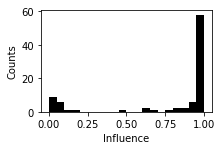

In [8]:
influence = [row[-1] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(influence, color='black', bins=20)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")

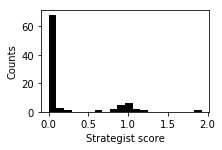

In [9]:
scores = [row[-2] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=20)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Strategist score")

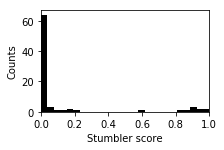

In [10]:
stumbler_scores = [row[-3] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=50)
_ = plt.tight_layout()
_ = plt.xlim(0, 1)
_ = plt.ylabel("Counts")
_ = plt.xlabel("Stumbler score")

## Strategist as a function of other parameters

In [11]:
learning_rates = [row[1] for row in table]

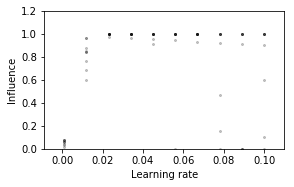

In [12]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rates, influence, color='black', alpha=0.2, s=4)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Influence")
_ = plt.ylim(0, 1.2)

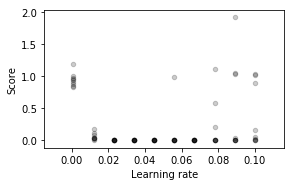

In [13]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rates, scores, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Score")

In [14]:
num_stumbles = [row[2] for row in table]m

SyntaxError: invalid syntax (<ipython-input-14-21ca8e718e9e>, line 1)

In [ ]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_stumbles, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Num. stumbles")
_ = plt.ylabel("Influence")
_ = plt.ylim(0, 1)

In [ ]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_stumbles, scores, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Num. stumbles")
_ = plt.ylabel("Score")

In [ ]:
num_strategies = [row[3] for row in table]

In [ ]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_strategies, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Num. strategies")
_ = plt.ylabel("Influence")
_ = plt.ylim(0, 1.2)

In [ ]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_strategies, scores, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Num. strategies")
_ = plt.ylabel("Score")
_ = plt.ylim(0, 1.2)